## Pipeline 2 Outlier Handling - Standard Deviation 

In [16]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# read the excel file
dfx = pd.read_csv('../csv_files/Capstone_p2_handled_skew.csv',index_col=0)
dfx.head(10)

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,A_FTPct,A_EFGPct,A_ThreePARt,A_FTR,A_REBPct,A_BLKPct,A_AST_TOV_Ratio
0,0.833,0.461538,0.395604,0.574169,0.506173,0.191273,1.101460,0.952,0.628049,0.463415,0.711380,0.493827,0.109890,1.135444
1,0.885,0.430851,0.404255,0.525924,0.538462,0.156174,1.021080,0.870,0.542683,0.414634,0.727744,0.461538,0.053191,1.146123
2,0.844,0.590909,0.428571,0.644658,0.486486,0.277350,1.164993,0.935,0.512821,0.397436,0.793993,0.513514,0.025974,1.104196
3,0.727,0.567568,0.364865,0.545250,0.475000,0.230940,1.122462,0.710,0.480000,0.453333,0.801817,0.525000,0.094595,1.095368
4,0.722,0.511905,0.369048,0.462910,0.540816,0.154303,1.154153,0.806,0.476190,0.511905,0.779418,0.459184,0.047619,1.211808
5,0.889,0.551724,0.471264,0.557086,0.523810,0.250000,1.194794,0.654,0.531250,0.437500,0.755042,0.476190,0.080460,1.164993
6,0.700,0.561224,0.418367,0.319438,0.404255,0.246183,1.171377,0.789,0.525253,0.393939,0.661881,0.595745,0.051020,1.122462
7,0.808,0.475490,0.441176,0.504878,0.466102,0.313112,1.086721,0.667,0.441176,0.431373,0.754186,0.533898,0.049020,1.016012
8,0.606,0.464706,0.411765,0.623085,0.455556,0.188982,1.122462,0.870,0.535714,0.309524,0.723373,0.544444,0.058824,1.129545
9,0.743,0.538043,0.445652,0.616794,0.569892,0.214423,1.252307,0.760,0.482759,0.367816,0.732159,0.430108,0.065217,1.065291


### Looking for Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1eff908>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1efff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1eff588>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1f0c668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1f0c9b0>],
 'means': []}

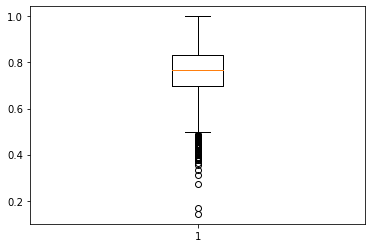

In [18]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTPct)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1edada0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1e6b4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1edac50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1e6bb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1e6beb8>],
 'means': []}

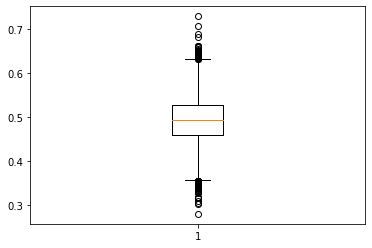

In [19]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.A_REBPct)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1e48358>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1e48a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1e48048>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1e510f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1e51438>],
 'means': []}

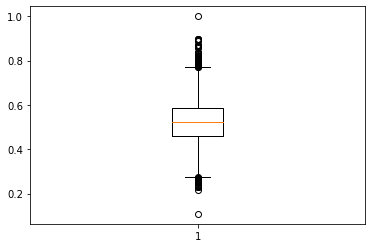

In [20]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTR)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1e20898>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1e20f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1e20438>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1dad630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1dad978>],
 'means': []}

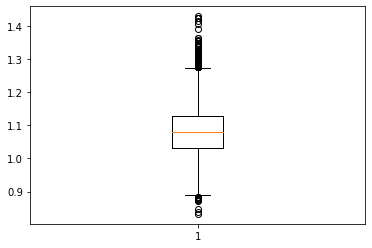

In [21]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.A_AST_TOV_Ratio)

### Handling the outliers

In [22]:
for col in dfx.columns:
    u_bound = dfx[col].mean() + 3* dfx[col].std()
    dfx[col][dfx[col] > u_bound] = u_bound

In [23]:
# check
pd.Series(dfx[col][dfx[col]] > u_bound).value_counts()

False    9844
Name: A_AST_TOV_Ratio, dtype: int64

In [24]:
for col in dfx.columns:
    l_bound = dfx[col].mean() - 3* dfx[col].std()
    dfx[col][dfx[col] < l_bound] = l_bound

In [25]:
# check
pd.Series(dfx[col][dfx[col]] < l_bound).value_counts()

False    9844
Name: A_AST_TOV_Ratio, dtype: int64

### Checking to see if it worked

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1c3b860>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1c3bef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1c3b470>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1c475c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1c47908>],
 'means': []}

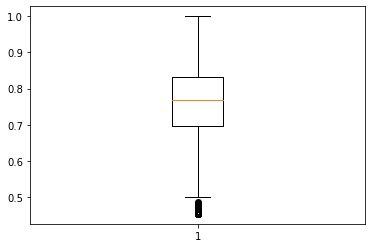

In [29]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTPct)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1cd3dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1ce14a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1cd3ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1ce1b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1ce1e80>],
 'means': []}

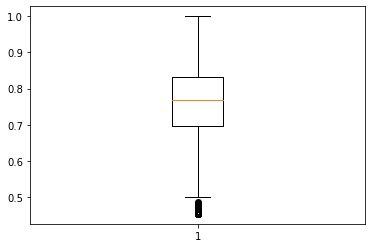

In [28]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTPct)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1c222e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1c22978>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1c62400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1bac048>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1bac390>],
 'means': []}

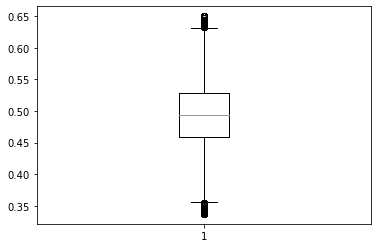

In [30]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.A_REBPct)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1b851d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1b858d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1b85080>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1b85f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1b8f2e8>],
 'means': []}

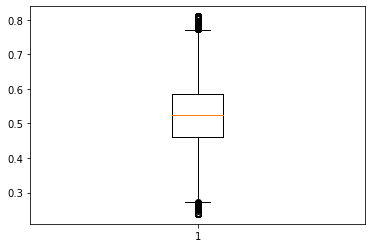

In [31]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTR)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1b5dcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1b693c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1b5d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1b69a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1b69da0>],
 'means': []}

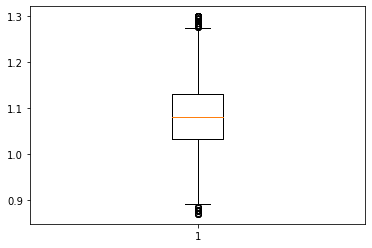

In [32]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.A_AST_TOV_Ratio)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2a1ac6588>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2a1ac6c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2a1ac6278>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2a1ad12e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2a1ad1630>],
 'means': []}

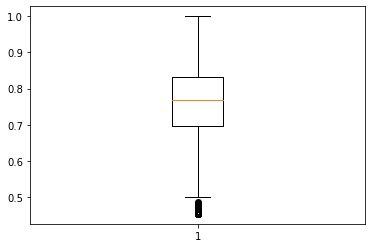

In [34]:
# Creating a box plot to detect outliers
plt.boxplot(dfx.H_FTPct)

In [35]:
# Saving to a csv
dfx.to_csv('../csv_files/Capstone_p2_3stdev.csv')